In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pylab as pl
import scipy.signal as signal
from scipy.signal import find_peaks

## 读取数据

In [2]:
root = r'D:\MyCodes\p\数据文件\excel\22-09-08\宾\60972905-269-03-L.csv'

In [3]:
def read_group2(root):
    """
    读取第二组数据
    """
    db = pd.read_csv(root, header=None)
    
    db1 = db.loc[:, 1:18]
    db2 = db.loc[:, 20:37]
    db2.columns = [i for i in db1]
    # db3 = db.loc[:, 39:56]
    # db3.columns = [i for i in db1]
    
    return db2
db = read_group2(root)

In [4]:
def del_col4col18(db):
    """删除第四、第十八通道"""
    return db.loc[:, list(range(1,4))+list(range(5,18))]
db = del_col4col18(db)

In [5]:
db.head()

,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.88941,-1.85745,-0.54820,-1.34566,-0.16494,0.28853,-0.09464,-0.64235,-0.90065,-1.00635,0.29143,-0.58648,-0.80238,-0.77142,-1.09133,-0.59204
1,-0.89215,-1.85882,-0.54865,-1.34670,-0.16668,0.28901,-0.09487,-0.64254,-0.90066,-1.00641,0.29132,-0.58637,-0.80243,-0.77149,-1.09141,-0.59232
2,-0.89258,-1.85994,-0.55056,-1.34752,-0.16674,0.28739,-0.09512,-0.64248,-0.90045,-1.00602,0.29198,-0.58638,-0.80209,-0.77164,-1.09163,-0.59225
3,-0.89191,-1.86109,-0.55083,-1.34895,-0.16564,0.28833,-0.09492,-0.64290,-0.90026,-1.00551,0.29290,-0.58569,-0.80149,-0.77171,-1.09194,-0.59224
4,-0.89212,-1.85924,-0.54927,-1.34586,-0.16496,0.29013,-0.09342,-0.64178,-0.90015,-1.00599,0.29194,-0.58647,-0.80229,-0.77210,-1.09189,-0.59187


In [6]:
db.loc[list(range(1,len(db),10)),:]

,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17
1,-0.89215,-1.85882,-0.54865,-1.34670,-0.16668,0.28901,-0.09487,-0.64254,-0.90066,-1.00641,0.29132,-0.58637,-0.80243,-0.77149,-1.09141,-0.59232
11,-0.89440,-1.86197,-0.55047,-1.34589,-0.16432,0.28901,-0.09502,-0.64298,-0.90058,-1.00529,0.29342,-0.58548,-0.80020,-0.77096,-1.09181,-0.59216
21,-0.89576,-1.86415,-0.55190,-1.34746,-0.16582,0.28975,-0.09475,-0.64235,-0.89979,-1.00432,0.29548,-0.58433,-0.79929,-0.77071,-1.09215,-0.59219
31,-0.89974,-1.86648,-0.55473,-1.34964,-0.16422,0.28899,-0.09450,-0.64164,-0.89901,-1.00428,0.29530,-0.58431,-0.79983,-0.77150,-1.09310,-0.59339
41,-0.90161,-1.86689,-0.55395,-1.34492,-0.16837,0.28799,-0.09431,-0.64185,-0.89909,-1.00430,0.29419,-0.58461,-0.80053,-0.77274,-1.09377,-0.59421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,-0.93575,-1.85029,-0.56394,-1.35487,-0.16880,0.27482,-0.10837,-0.66337,-0.91914,-1.03005,0.24618,-0.61561,-0.84230,-0.80898,-1.14183,-0.65747
5081,-0.93653,-1.85769,-0.56821,-1.35979,-0.17321,0.27123,-0.11161,-0.66517,-0.91904,-1.02840,0.24972,-0.61261,-0.83919,-0.80446,-1.13567,-0.65198
5091,-0.93802,-1.85955,-0.57419,-1.36859,-0.17230,0.26957,-0.11256,-0.66496,-0.91828,-1.02647,0.25226,-0.60956,-0.83430,-0.79630,-1.12560,-0.64297
5101,-0.93836,-1.86049,-0.57423,-1.37085,-0.17201,0.27132,-0.11421,-0.66514,-0.91920,-1.02746,0.25164,-0.60866,-0.83139,-0.78568,-1.11048,-0.62673


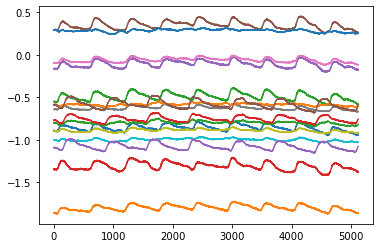

In [7]:
plt.plot(db);

<Figure size 432x288 with 0 Axes>

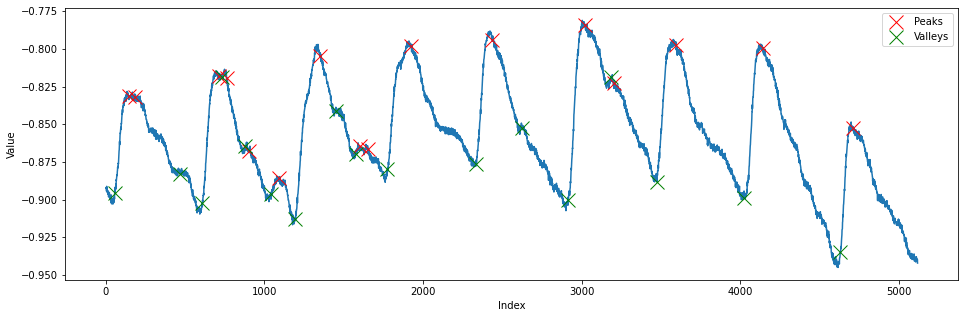

In [8]:
def plot_max_min(db,num_iter=1,func=np.greater):
    db = db.loc[list(range(1,len(db),1)),1]
    
    # 查找峰值和谷值
    rolling_mean = db.rolling(window=30).max()
    peaks, _ = find_peaks(rolling_mean)
    rolling_mean = db.rolling(window=30).min()
    valleys, _ = find_peaks(-rolling_mean)
    
    # 绘制曲线图
    plt.figure()
    fig, ax = plt.subplots(figsize=(16, 5))
    plt.plot(np.arange(len(db)), np.array(db))

    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

    # 在曲线图上标注峰值和谷值
    ax.plot(peaks, db.iloc[peaks], 'x', color='r', markersize=14, label='Peaks')
    ax.plot(valleys, db.iloc[valleys], 'x', color='g', markersize=14, label='Valleys')
    ax.legend()

    plt.show()
# def plot_max_min(db,num_iter=1,func=np.greater):
#     db = db.loc[list(range(1,len(db),1)),1]
#     """绘制极值点"""
#     plt.figure()
#     plt.figure(figsize=(16,5))
#     plt.plot(np.arange(len(db)), np.array(db))

#     a, b = signal.argrelextrema(np.array(db),func)[0], np.array(db)[signal.argrelextrema(np.array(db), func)]
#     c, d = signal.argrelextrema(-np.array(db),func)[0], np.array(db)[signal.argrelextrema(-np.array(db), func)]

#     for i in range(num_iter):
#         a, b = np.array(a)[signal.argrelextrema(np.array(b),func)[0]],np.array(b)[signal.argrelextrema(np.array(b), func)]
#         c, d = np.array(c)[signal.argrelextrema(-np.array(d),func)[0]],np.array(d)[signal.argrelextrema(-np.array(d), func)]
        
#     plt.plot(a, b,'x', color='r', markersize=14)
#     plt.plot(c, d,'o', color='g', markersize=14)
#     plt.show()
plot_max_min(db,num_iter=2)

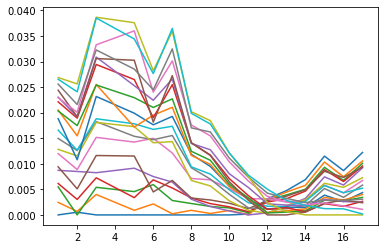

In [9]:
def ori_pluse_chart(db, wide_range=[500, 1500]):
    """绘制频域图"""
    db = db.loc[list(range(wide_range[0], wide_range[1])), :]
    db = db - db.min()
    plt.plot(db.T);
ori_pluse_chart(db, wide_range=[80, 100])

## 计算各类指标

#### 获取峰值谷值

In [10]:
def get_peaks_valleys(db,num_iter=1,func=np.greater):
    db = db.loc[list(range(1,len(db),1)),1]
    #db = db.diff()
    rolling_mean = db.rolling(window=30).max()
    
    # 查找峰值和谷值
    peaks, _ = find_peaks(rolling_mean)
    valleys, _ = find_peaks(-rolling_mean)
    
    a = np.concatenate(([peaks], [valleys]), axis=0)
    return peaks, valleys, a
a, b, c = get_peaks_valleys(db)
print(c)
print(np.array(db.loc[:,[1,2]]))
print(np.array(db.loc[:,[1,2,3]])[c])

[[ 148  181  712  762  903 1091 1351 1604 1653 1925 2436 3018 3207 3593
  4143 4713]
 [  53  166  603  738  882 1037 1198 1582 1638 1772 2334 2913 3176 3475
  4033 4621]]
[[-0.88941 -1.85745]
 [-0.89215 -1.85882]
 [-0.89258 -1.85994]
 ...
 [-0.9408  -1.86384]
 [-0.93971 -1.85998]
 [-0.94206 -1.86071]]
[[[-0.83123 -1.79993 -0.45005]
  [-0.8302  -1.80673 -0.45894]
  [-0.81743 -1.767   -0.43505]
  [-0.82095 -1.76766 -0.438  ]
  [-0.86778 -1.80176 -0.49509]
  [-0.88658 -1.83756 -0.54474]
  [-0.80333 -1.74547 -0.41072]
  [-0.86621 -1.79616 -0.50031]
  [-0.86587 -1.81134 -0.51669]
  [-0.79855 -1.75199 -0.42198]
  [-0.79242 -1.74182 -0.41367]
  [-0.78423 -1.73011 -0.38856]
  [-0.82476 -1.76543 -0.46151]
  [-0.79633 -1.74514 -0.41173]
  [-0.80198 -1.74744 -0.42239]
  [-0.85303 -1.77724 -0.46499]]

 [[-0.89936 -1.86719 -0.5536 ]
  [-0.83347 -1.80239 -0.45654]
  [-0.90657 -1.84373 -0.55531]
  [-0.82045 -1.77257 -0.43411]
  [-0.86473 -1.80579 -0.49049]
  [-0.89845 -1.82587 -0.5315 ]
  [-0.91041 -

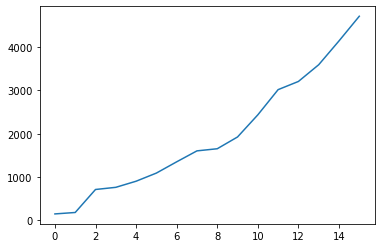

In [11]:
plt.plot(a)